In [7]:
import pandas as pd
import nltk
#nltk.download('averaged_perceptron_tagger')

# Part of speech tagging

In [8]:
wisdom = "To be or not to be, once said a bee. The bee wanted to be, but she remained just a bee"

In [9]:
print(wisdom)

To be or not to be, once said a bee. The bee wanted to be, but she remained just a bee


In [10]:
words = nltk.word_tokenize(wisdom)

In [11]:
nltk.pos_tag(words)

[('To', 'TO'),
 ('be', 'VB'),
 ('or', 'CC'),
 ('not', 'RB'),
 ('to', 'TO'),
 ('be', 'VB'),
 (',', ','),
 ('once', 'RB'),
 ('said', 'VBD'),
 ('a', 'DT'),
 ('bee', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('bee', 'NN'),
 ('wanted', 'VBD'),
 ('to', 'TO'),
 ('be', 'VB'),
 (',', ','),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('remained', 'VBD'),
 ('just', 'RB'),
 ('a', 'DT'),
 ('bee', 'NN')]

# In summaries we are usually interested in nouns

In [13]:
tags = nltk.pos_tag(words)

In [15]:
tags[0]

('To', 'TO')

In [17]:
[word for word,tag in tags if tag.startswith('N')]

['bee', 'bee', 'bee']

In [16]:
[word for word,tag in tags if tag.startswith('V')]

['be', 'be', 'said', 'wanted', 'be', 'remained']

# Use the same technique to create a better summary for the first earning call

In [18]:
data = pd.read_csv('../data/EC2000.csv.gz')

1- drop first column index, rename fName to company, drop the last three columns

In [19]:
data2 = data.drop('index', axis='columns')

In [20]:
data3 = data2.rename({'fName':'company'}, axis='columns')

In [21]:
last_three_cols = data3.columns[-3:]

In [22]:
data4 = data3.drop(last_three_cols, axis='columns')

In [23]:
data4.head()

id                                               text  \
0  32934  Zoe's Kitchen, Inc. (NYSE:ZOES)\nQ2 2015 Earni...   
1  32905  Autodesk, Inc. (NASDAQ:ADSK)\nQ2 2016 Earnings...   
2  32926  Smith & Wesson Holding Corp. (NASDAQ:SWHC)\nQ1...   
3  32930  Ulta Salon, Cosmetics & Fragrance, Inc. (NASDA...   
4  32907  Splunk Inc. (NASDAQ:SPLK)\nQ2 2016 Earnings Co...   

                  date                                  company  \
0  2015-08-28 00:11:00                      Zoe's Kitchen, Inc.   
1  2015-08-28 00:07:00                           Autodesk, Inc.   
2  2015-08-27 23:25:00       Smith & Wesson Holding Corporation   
3  2015-08-27 23:09:00  Ulta Salon, Cosmetics & Fragrance, Inc.   
4  2015-08-27 22:56:00                              Splunk Inc.   

              sector  
0  Consumer Services  
1         Technology  
2      Capital Goods  
3  Consumer Services  
4         Technology

In [59]:
def word_freq(text):
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    filtered = [word.capitalize() for word, tag in tags if tag.startswith('N')]
    sw = pd.Series(filtered).value_counts()
    return sw.to_dict()

In [71]:
def word_cloud(word_freq):
    wc=WordCloud(max_font_size=50, max_words=150, background_color="white")
    wc.generate_from_frequencies(word_freq)
    plt.figure(figsize=(25,12))    
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.savefig('fig.png')

In [63]:
data5 = data4.head()

In [64]:
freqs = data5.text.apply(word_freq)

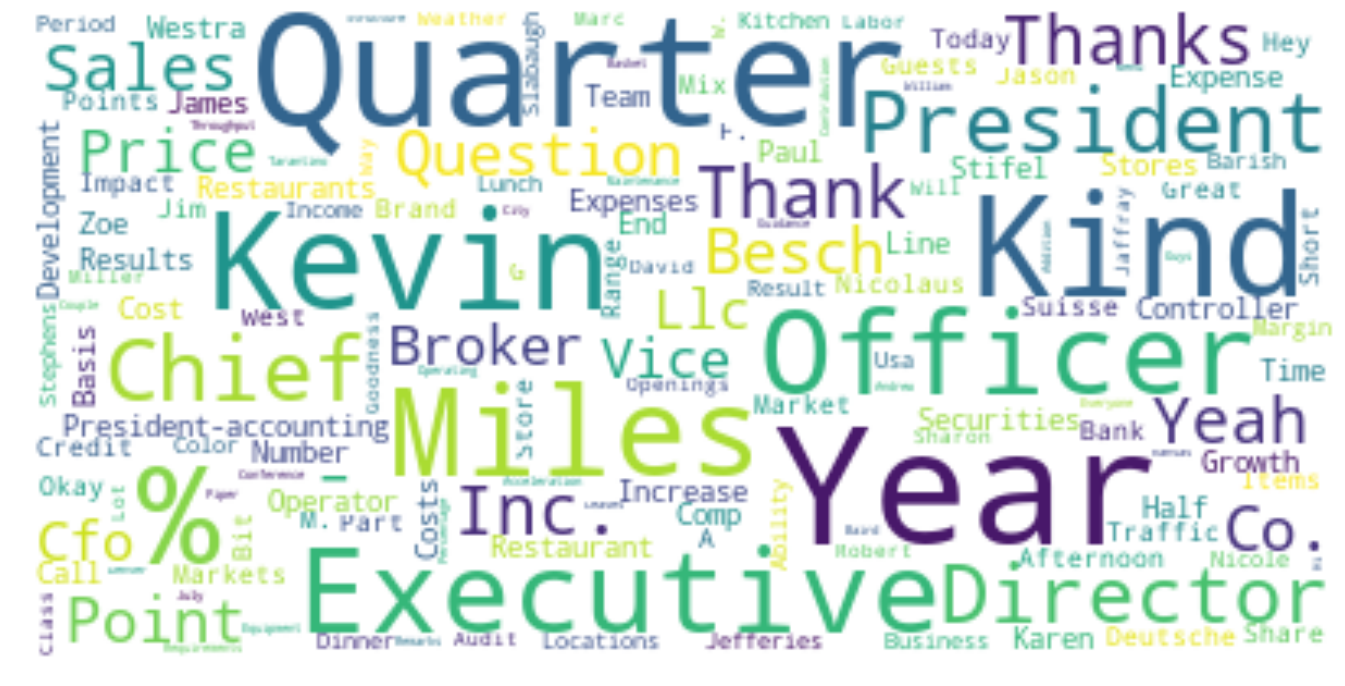

In [72]:
word_cloud(freqs[0])

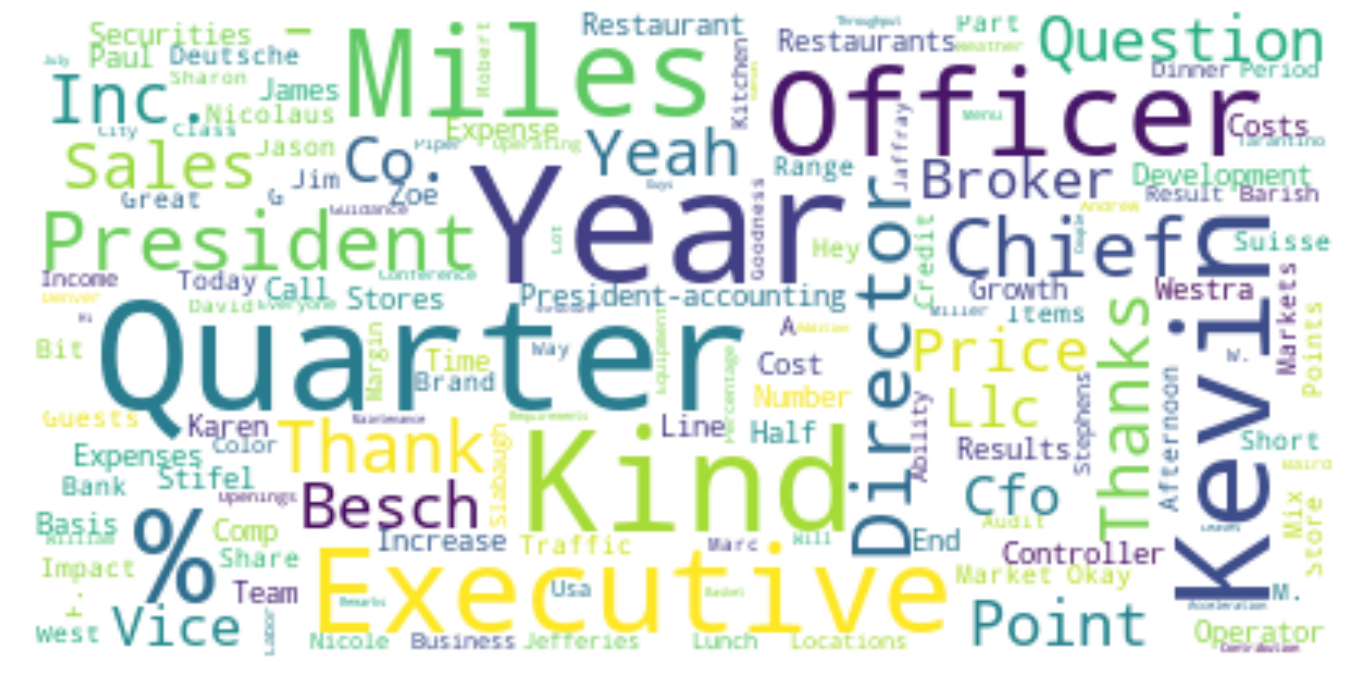

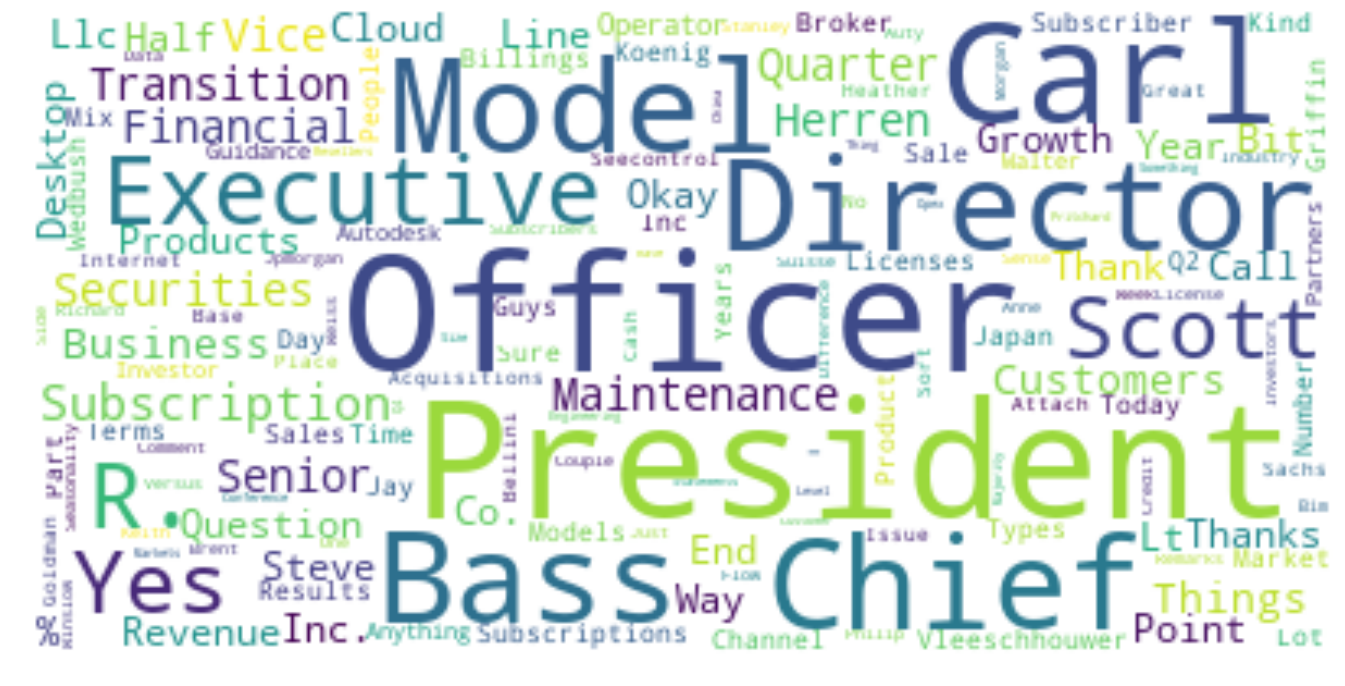

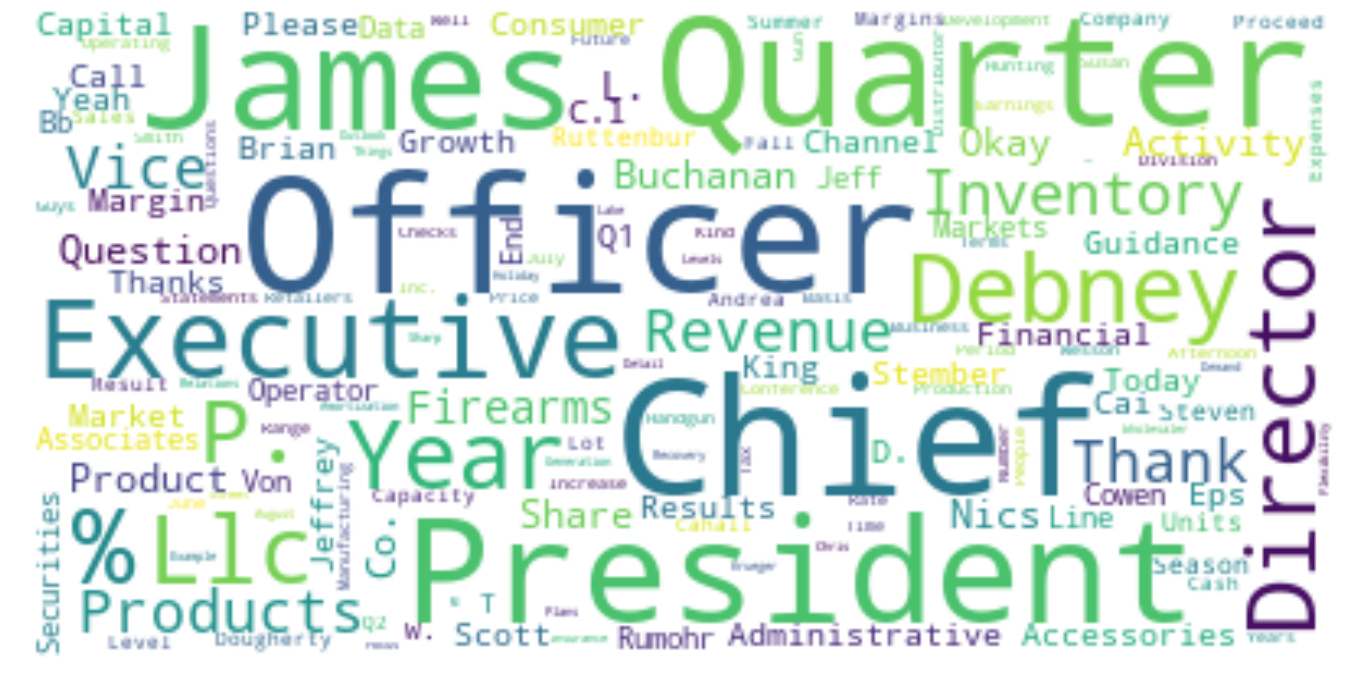

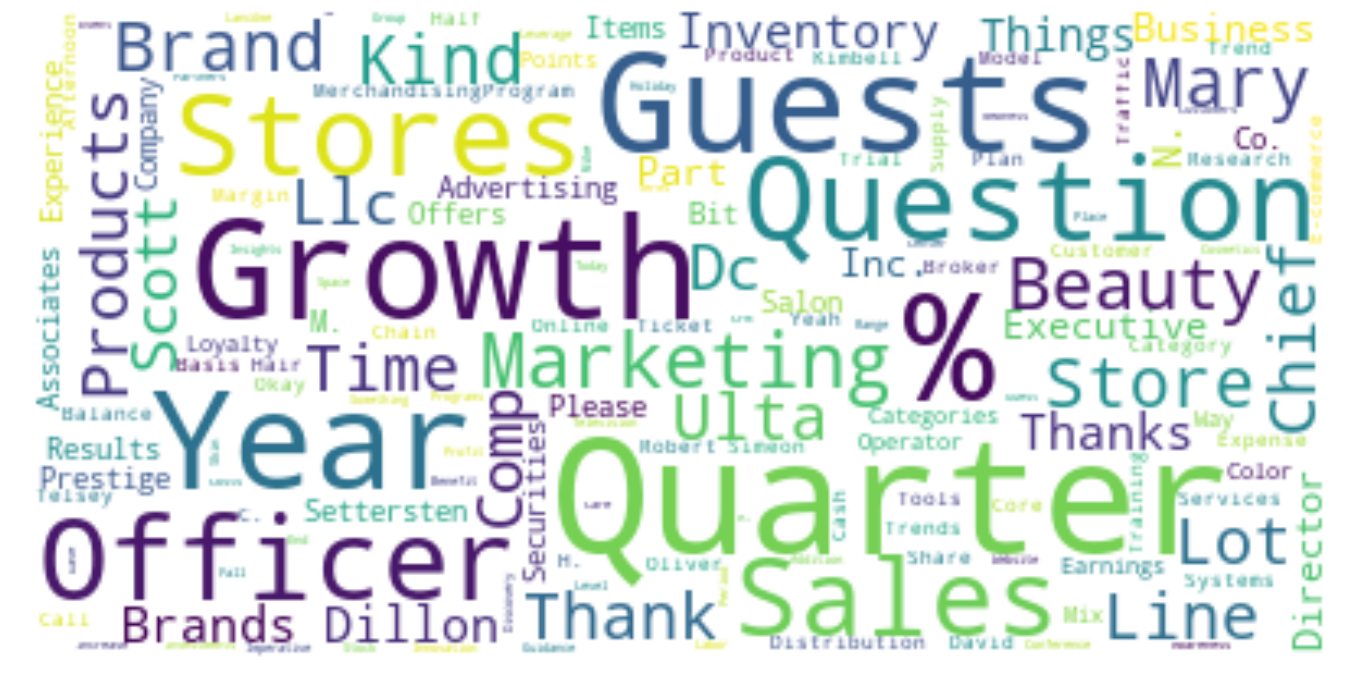

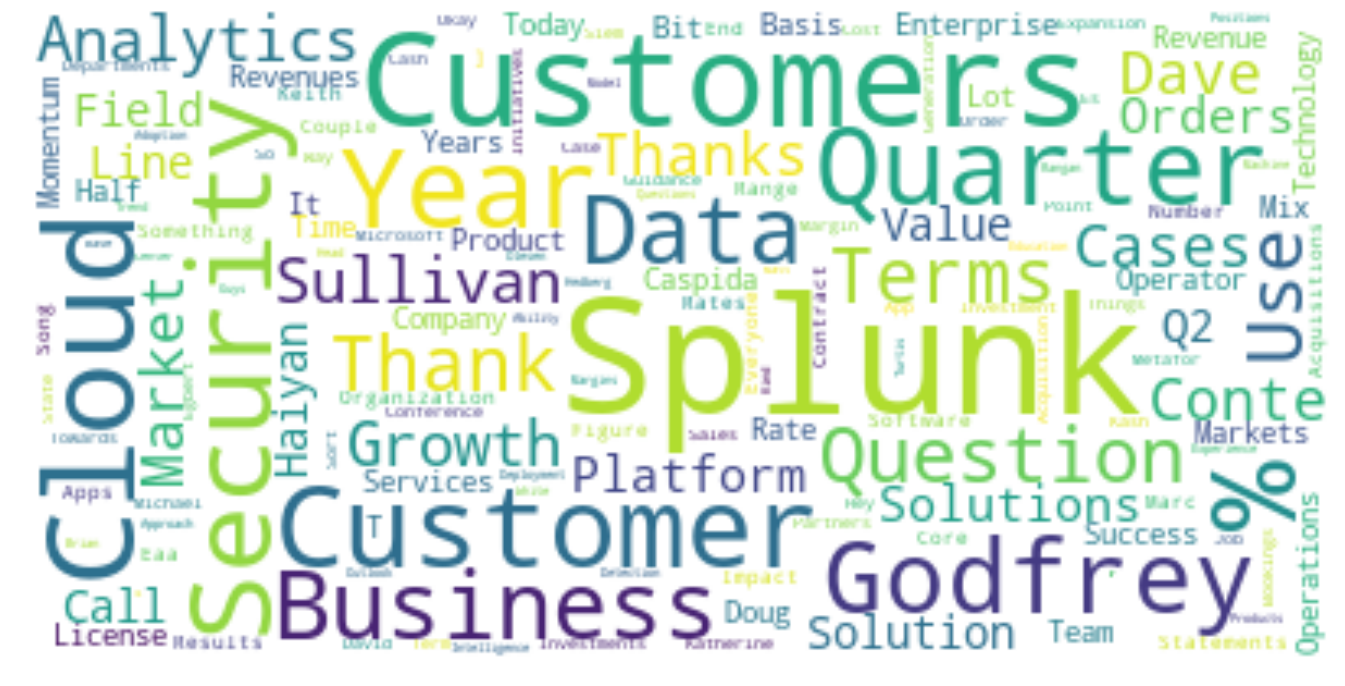

In [70]:
for freq in freqs:
    word_cloud(freq)

In [46]:
text1 = data4.iloc[1].text

In [47]:
words = nltk.word_tokenize(text1)
#words

In [48]:
tags = nltk.pos_tag(words)

In [49]:
filtered = [word.capitalize() for word, tag in tags if tag.startswith('N')]

In [50]:
sw = pd.Series(filtered).value_counts()

(-0.5, 399.5, 199.5, -0.5)

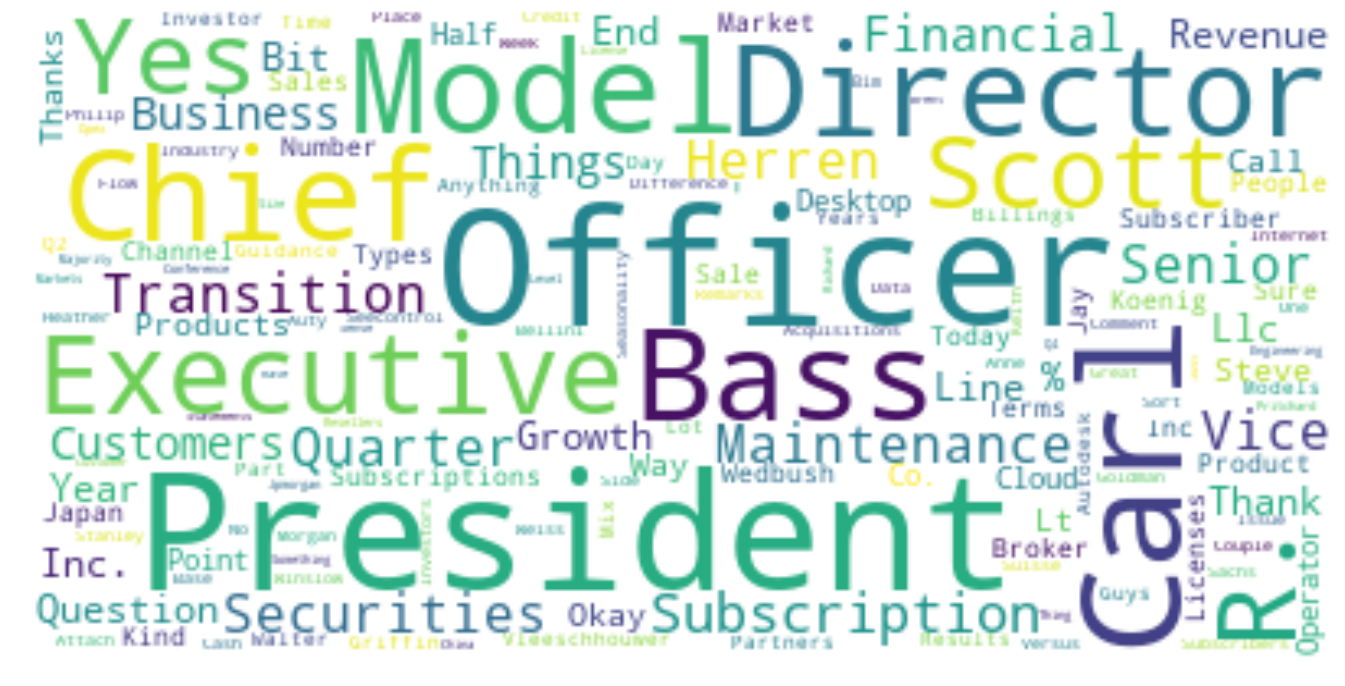

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
